In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import modules
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/DS Project/DisneylandReviews.csv", encoding="latin-1")
dataframe.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
print(dataframe["Review_Text"][0])
print(dataframe["Review_Text"][1])
print(dataframe["Review_Text"][2])

If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. 
Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but 

In [ ]:
dataframe['Branch'].value_counts()

Branch
Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: count, dtype: int64

In [ ]:
df_Paris= dataframe[dataframe['Branch']=="Disneyland_Paris"]
df_Paris.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
29026,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris
29028,670606796,5,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris
29029,670586937,4,2019-4,Australia,We didn't realise it was school holidays when ...,Disneyland_Paris
29030,670535589,5,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris


<ipython-input-15-84e756ba14b9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


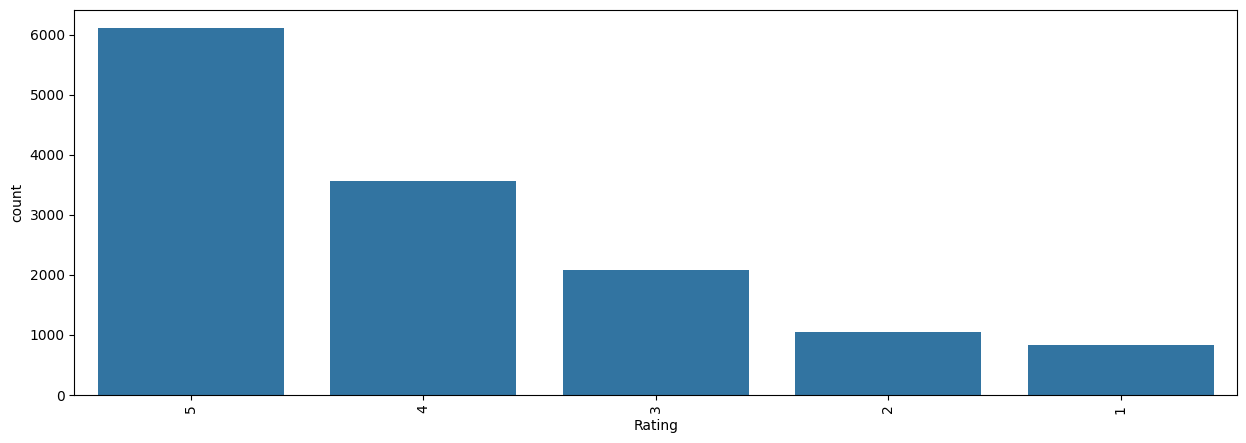

In [ ]:

plt.figure(figsize=(15,5))
ax = sns.countplot(x="Rating", data=df_Paris,
                   order = df_Paris['Rating'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

# Paris Disneyland Analysis

In [ ]:
# one line of code! we made a new column and populated it
df_Paris['New_Rating'] = np.where(df_Paris['Rating'] < 3, 0, 1)

df_Paris.head()

<ipython-input-66-9ca285fa12b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Paris['New_Rating'] = np.where(df_Paris['Rating'] < 3, 0, 1)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
29026,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,1
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris,1
29028,670606796,5,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,1
29029,670586937,4,2019-4,Australia,We didn't realise it was school holidays when ...,Disneyland_Paris,1
29030,670535589,5,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,1


## Exploring the text data

###High Rating Reviews Analysis for Paris DisneyLand

In [ ]:
df_Paris_high = df_Paris[df_Paris['New_Rating']==1]
df_Paris_high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11758 entries, 29026 to 42655
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          11758 non-null  int64 
 1   Rating             11758 non-null  int64 
 2   Year_Month         11758 non-null  object
 3   Reviewer_Location  11758 non-null  object
 4   Review_Text        11758 non-null  object
 5   Branch             11758 non-null  object
 6   New_Rating         11758 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 734.9+ KB


In [ ]:
df_Paris_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
29026,670721950,5,2019-3,United Arab Emirates,"We've been to Disneyland Hongkong and Tokyo, s...",Disneyland_Paris,1
29027,670686565,4,2018-6,United Kingdom,I went to Disneyland Paris in April 2018 on Ea...,Disneyland_Paris,1
29028,670606796,5,2019-4,United Kingdom,"What a fantastic place, the queues were decent...",Disneyland_Paris,1
29029,670586937,4,2019-4,Australia,We didn't realise it was school holidays when ...,Disneyland_Paris,1
29030,670535589,5,missing,France,A Trip to Disney makes you all warm and fuzzy ...,Disneyland_Paris,1


In [ ]:
print(df_Paris_high.index)


Index([29026, 29027, 29028, 29029, 29030, 29031, 29032, 29033, 29035, 29036,
       ...
       42645, 42646, 42648, 42649, 42650, 42651, 42652, 42653, 42654, 42655],
      dtype='int64', length=11758)


In [ ]:
df_Paris_high = df_Paris_high.reset_index(drop=True)


In [ ]:
print(df_Paris_high['Review_Text'][0])
print(df_Paris_high['Review_Text'][1])
print(df_Paris_high['Review_Text'][2])


We've been to Disneyland Hongkong and Tokyo, so far this one is the best. We're looking forward to visit the biggest one in Orlando. 1 day is not enough, it is recommended to stay in Disney Hotel   Resort so you can enjoy the fast track.. save huge amount of time.. if you're not staying there, plan and strategize your visit by getting all the fast track passes from kiosk nearby the attraction; then come back when it's time for your ride. The projection and fireworks show are out of this world!!
I went to Disneyland Paris in April 2018 on Easter weekend, I know it says June 2018 but I can't choose a date before then, and I loved it, me and my mum went and as I have autism we managed to get a disability pass for both parks. Disney are excellent with disability access and cater to all types of disabilities, both visible (wheelchair users, etc.) and invisible (autism, etc.), we managed to get on a lot of rides because with the pass you don't queue in the normal queue but the entrance for d

##Lowercase

In [ ]:
df_Paris_high['Review_Text'] = df_Paris_high['Review_Text'].str.lower()
df_Paris_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670721950,5,2019-3,United Arab Emirates,"we've been to disneyland hongkong and tokyo, s...",Disneyland_Paris,1
1,670686565,4,2018-6,United Kingdom,i went to disneyland paris in april 2018 on ea...,Disneyland_Paris,1
2,670606796,5,2019-4,United Kingdom,"what a fantastic place, the queues were decent...",Disneyland_Paris,1
3,670586937,4,2019-4,Australia,we didn't realise it was school holidays when ...,Disneyland_Paris,1
4,670535589,5,missing,France,a trip to disney makes you all warm and fuzzy ...,Disneyland_Paris,1


In [ ]:
print(df_Paris_high['Review_Text'][0])
print(df_Paris_high['Review_Text'][1])
print(df_Paris_high['Review_Text'][2])


we've been to disneyland hongkong and tokyo, so far this one is the best. we're looking forward to visit the biggest one in orlando. 1 day is not enough, it is recommended to stay in disney hotel   resort so you can enjoy the fast track.. save huge amount of time.. if you're not staying there, plan and strategize your visit by getting all the fast track passes from kiosk nearby the attraction; then come back when it's time for your ride. the projection and fireworks show are out of this world!!
i went to disneyland paris in april 2018 on easter weekend, i know it says june 2018 but i can't choose a date before then, and i loved it, me and my mum went and as i have autism we managed to get a disability pass for both parks. disney are excellent with disability access and cater to all types of disabilities, both visible (wheelchair users, etc.) and invisible (autism, etc.), we managed to get on a lot of rides because with the pass you don't queue in the normal queue but the entrance for d


##Strip funky characters (!,~-@$% etc)

In [ ]:
# Convert all entries in the 'Review_Text' column to strings
df_Paris_high["Review_Text"] = df_Paris_high["Review_Text"].astype(str)

# Remove any funky characters with a blank, including handling extra spaces and trimming
df_Paris_high['Review_Text'] = df_Paris_high['Review_Text'].str.replace('[^a-zA-Z ]', '', regex=True).str.replace(' +', ' ', regex=True).str.strip()

# Display the cleaned DataFrame
df_Paris_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670721950,5,2019-3,United Arab Emirates,weve been to disneyland hongkong and tokyo so ...,Disneyland_Paris,1
1,670686565,4,2018-6,United Kingdom,i went to disneyland paris in april on easter ...,Disneyland_Paris,1
2,670606796,5,2019-4,United Kingdom,what a fantastic place the queues were decent ...,Disneyland_Paris,1
3,670586937,4,2019-4,Australia,we didnt realise it was school holidays when w...,Disneyland_Paris,1
4,670535589,5,missing,France,a trip to disney makes you all warm and fuzzy ...,Disneyland_Paris,1


In [ ]:
df_Paris_high['Review_Text'] = df_Paris_high['Review_Text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_Paris_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670721950,5,2019-3,United Arab Emirates,weve been to disneyland hongkong and tokyo so ...,Disneyland_Paris,1
1,670686565,4,2018-6,United Kingdom,i went to disneyland paris in april on easter ...,Disneyland_Paris,1
2,670606796,5,2019-4,United Kingdom,what a fantastic place the queues were decent ...,Disneyland_Paris,1
3,670586937,4,2019-4,Australia,we didnt realise it was school holidays when w...,Disneyland_Paris,1
4,670535589,5,missing,France,a trip to disney makes you all warm and fuzzy ...,Disneyland_Paris,1


In [ ]:
print(df_Paris_high['Review_Text'][0])
print(df_Paris_high['Review_Text'][1])
print(df_Paris_high['Review_Text'][2])


weve been to disneyland hongkong and tokyo so far this one is the best were looking forward to visit the biggest one in orlando day is not enough it is recommended to stay in disney hotel resort so you can enjoy the fast track save huge amount of time if youre not staying there plan and strategize your visit by getting all the fast track passes from kiosk nearby the attraction then come back when its time for your ride the projection and fireworks show are out of this world
i went to disneyland paris in april on easter weekend i know it says june but i cant choose a date before then and i loved it me and my mum went and as i have autism we managed to get a disability pass for both parks disney are excellent with disability access and cater to all types of disabilities both visible wheelchair users etc and invisible autism etc we managed to get on a lot of rides because with the pass you dont queue in the normal queue but the entrance for disabilities i can only fault one thing when i w

##Stop words

In [ ]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_Paris_high['Review_Text'] = df_Paris_high['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_Paris_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670721950,5,2019-3,United Arab Emirates,"we've disneyland hongkong tokyo, far one best....",Disneyland_Paris,1
1,670686565,4,2018-6,United Kingdom,went disneyland paris april 2018 easter weeken...,Disneyland_Paris,1
2,670606796,5,2019-4,United Kingdom,"fantastic place, queues decent best time year ...",Disneyland_Paris,1
3,670586937,4,2019-4,Australia,"realise school holidays went, consequently ext...",Disneyland_Paris,1
4,670535589,5,missing,France,trip disney makes warm fuzzy actual kid again....,Disneyland_Paris,1


In [ ]:
print(df_Paris_high['Review_Text'][0])
print(df_Paris_high['Review_Text'][1])
print(df_Paris_high['Review_Text'][2])


we've disneyland hongkong tokyo, far one best. we're looking forward visit biggest one orlando. 1 day enough, recommended stay disney hotel resort enjoy fast track.. save huge amount time.. staying there, plan strategize visit getting fast track passes kiosk nearby attraction; come back time ride. projection fireworks show world!!
went disneyland paris april 2018 easter weekend, know says june 2018 can't choose date then, loved it, mum went autism managed get disability pass parks. disney excellent disability access cater types disabilities, visible (wheelchair users, etc.) invisible (autism, etc.), managed get lot rides pass queue normal queue entrance disabilities. fault one thing went met spider man photos taken pay photos expensive, even pay one photo. food spectacular edible nice, variety food outlets plenty choice. would loved go halloween christmas would love go again.
fantastic place, queues decent best time year go apparently, managed see almost everything, bit disappointed ha

##Text EDA on the Paris high rating Data


## Most common words

In [ ]:
myTable = df_Paris_high['Review_Text'].str.split(expand=True).stack().value_counts()
myTable[0:20] # too cool!

park          12278
disney        11826
rides          9273
get            7475
time           7318
disneyland     6040
day            5977
one            5931
go             5901
would          5393
food           4550
good           4505
great          4498
really         4493
ride           3848
see            3747
went           3632
paris          3585
much           3494
also           3493
Name: count, dtype: int64

In [ ]:
x = df_Paris_high['Review_Text'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,park,12278
1,disney,11826
2,rides,9273
3,get,7475
4,time,7318


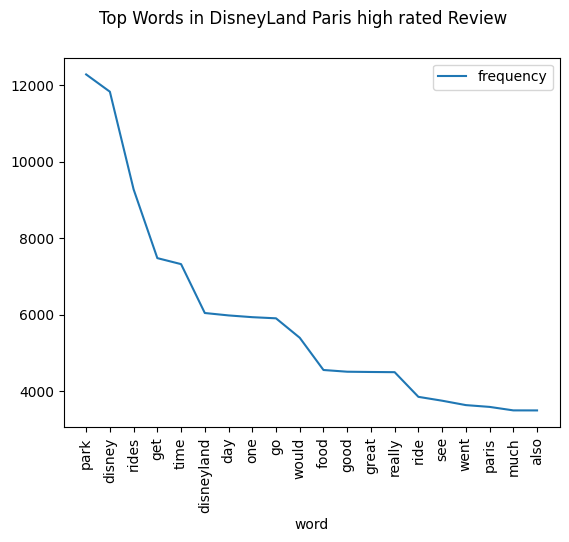

In [ ]:
x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in DisneyLand Paris high rated Review')
plt.show()


## Word Cloud

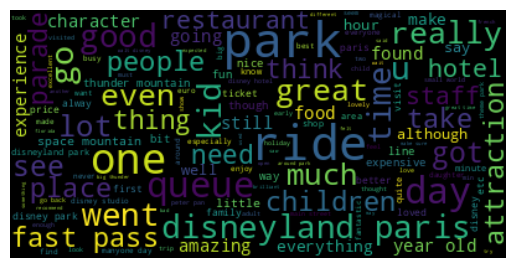

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_Paris_high['Review_Text']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_Paris_high['Review_Text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##Tokenizer

In [ ]:
df_Paris_high['Review_Text'] = df_Paris_high.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)
df_Paris_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670721950,5,2019-3,United Arab Emirates,"[we, 've, disneyland, hongkong, tokyo, ,, far,...",Disneyland_Paris,1
1,670686565,4,2018-6,United Kingdom,"[went, disneyland, paris, april, 2018, easter,...",Disneyland_Paris,1
2,670606796,5,2019-4,United Kingdom,"[fantastic, place, ,, queues, decent, best, ti...",Disneyland_Paris,1
3,670586937,4,2019-4,Australia,"[realise, school, holidays, went, ,, consequen...",Disneyland_Paris,1
4,670535589,5,missing,France,"[trip, disney, makes, warm, fuzzy, actual, kid...",Disneyland_Paris,1


In [ ]:
print(df_Paris_high['Review_Text'][0])
print(df_Paris_high['Review_Text'][1])
print(df_Paris_high['Review_Text'][2])


['we', "'ve", 'disneyland', 'hongkong', 'tokyo', ',', 'far', 'one', 'best', '.', 'we', "'re", 'looking', 'forward', 'visit', 'biggest', 'one', 'orlando', '.', '1', 'day', 'enough', ',', 'recommended', 'stay', 'disney', 'hotel', 'resort', 'enjoy', 'fast', 'track', '..', 'save', 'huge', 'amount', 'time', '..', 'staying', 'there', ',', 'plan', 'strategize', 'visit', 'getting', 'fast', 'track', 'passes', 'kiosk', 'nearby', 'attraction', ';', 'come', 'back', 'time', 'ride', '.', 'projection', 'fireworks', 'show', 'world', '!', '!']
['went', 'disneyland', 'paris', 'april', '2018', 'easter', 'weekend', ',', 'know', 'says', 'june', '2018', 'ca', "n't", 'choose', 'date', 'then', ',', 'loved', 'it', ',', 'mum', 'went', 'autism', 'managed', 'get', 'disability', 'pass', 'parks', '.', 'disney', 'excellent', 'disability', 'access', 'cater', 'types', 'disabilities', ',', 'visible', '(', 'wheelchair', 'users', ',', 'etc', '.', ')', 'invisible', '(', 'autism', ',', 'etc', '.', ')', ',', 'managed', 'get

## Lexicon Normalization

###Stemming

In [ ]:

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# this is the function we will use
ps = PorterStemmer()

filtered_sent = df_Paris_high['Review_Text'][1]

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)


Filtered Sentence: ['went', 'disneyland', 'paris', 'april', '2018', 'easter', 'weekend', ',', 'know', 'says', 'june', '2018', 'ca', "n't", 'choose', 'date', 'then', ',', 'loved', 'it', ',', 'mum', 'went', 'autism', 'managed', 'get', 'disability', 'pass', 'parks', '.', 'disney', 'excellent', 'disability', 'access', 'cater', 'types', 'disabilities', ',', 'visible', '(', 'wheelchair', 'users', ',', 'etc', '.', ')', 'invisible', '(', 'autism', ',', 'etc', '.', ')', ',', 'managed', 'get', 'lot', 'rides', 'pass', 'queue', 'normal', 'queue', 'entrance', 'disabilities', '.', 'fault', 'one', 'thing', 'went', 'met', 'spider', 'man', 'photos', 'taken', 'pay', 'photos', 'expensive', ',', 'even', 'pay', 'one', 'photo', '.', 'food', 'spectacular', 'edible', 'nice', ',', 'variety', 'food', 'outlets', 'plenty', 'choice', '.', 'would', 'loved', 'go', 'halloween', 'christmas', 'would', 'love', 'go', 'again', '.']
Stemmed Sentence: ['went', 'disneyland', 'pari', 'april', '2018', 'easter', 'weekend', ',',

In [ ]:

df_Paris_high['Stemmed'] = df_Paris_high['Review_Text'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.

In [ ]:
# check your work!
print(df_Paris_high['Review_Text'][0]) # reported
print(df_Paris_high['Stemmed'][0]) # report

print(df_Paris_high['Review_Text'][10]) # note the difference between inches, reported, covered
print(df_Paris_high['Stemmed'][10]) # inch, report, cover

['we', "'ve", 'disneyland', 'hongkong', 'tokyo', ',', 'far', 'one', 'best', '.', 'we', "'re", 'looking', 'forward', 'visit', 'biggest', 'one', 'orlando', '.', '1', 'day', 'enough', ',', 'recommended', 'stay', 'disney', 'hotel', 'resort', 'enjoy', 'fast', 'track', '..', 'save', 'huge', 'amount', 'time', '..', 'staying', 'there', ',', 'plan', 'strategize', 'visit', 'getting', 'fast', 'track', 'passes', 'kiosk', 'nearby', 'attraction', ';', 'come', 'back', 'time', 'ride', '.', 'projection', 'fireworks', 'show', 'world', '!', '!']
['we', "'ve", 'disneyland', 'hongkong', 'tokyo', ',', 'far', 'one', 'best', '.', 'we', "'re", 'look', 'forward', 'visit', 'biggest', 'one', 'orlando', '.', '1', 'day', 'enough', ',', 'recommend', 'stay', 'disney', 'hotel', 'resort', 'enjoy', 'fast', 'track', '..', 'save', 'huge', 'amount', 'time', '..', 'stay', 'there', ',', 'plan', 'strateg', 'visit', 'get', 'fast', 'track', 'pass', 'kiosk', 'nearbi', 'attract', ';', 'come', 'back', 'time', 'ride', '.', 'project

###Low Rating Reviews Analysis for California DisneyLand

In [ ]:
df_Paris_low = df_Paris[df_Paris['New_Rating']==0]
df_Paris_low.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 29034 to 42647
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          1872 non-null   int64 
 1   Rating             1872 non-null   int64 
 2   Year_Month         1872 non-null   object
 3   Reviewer_Location  1872 non-null   object
 4   Review_Text        1872 non-null   object
 5   Branch             1872 non-null   object
 6   New_Rating         1872 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 117.0+ KB


In [ ]:
df_Paris_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
29034,670216406,2,2019-4,Greece,"We booked tickets on line for Disneyland, this...",Disneyland_Paris,0
29043,669337300,1,2019-4,Greece,Why they selling fastpass tickets without have...,Disneyland_Paris,0
29047,669121201,2,2019-4,Switzerland,We went to Disneyland Paris during the Easter ...,Disneyland_Paris,0
29053,668207242,1,2019-4,United Kingdom,Its a shame this park carry the name Disney......,Disneyland_Paris,0
29058,668123744,2,2019-4,United Kingdom,I know Disneyland is a money machine but hadn ...,Disneyland_Paris,0


In [ ]:
print(df_Paris_low.index)


Index([29034, 29043, 29047, 29053, 29058, 29064, 29065, 29067, 29074, 29078,
       ...
       42629, 42630, 42633, 42635, 42636, 42639, 42640, 42641, 42643, 42647],
      dtype='int64', length=1872)


In [ ]:
df_Paris_low = df_Paris_low.reset_index(drop=True)


In [ ]:
print(df_Paris_low['Review_Text'][0])
print(df_Paris_low['Review_Text'][1])
print(df_Paris_low['Review_Text'][2])


We booked tickets on line for Disneyland, this is something I recommend, the lines were already long when we got there, so booking your tickets in advance does help.I was advised to buy a fast passes, but i decided not to, because it was not clear to me on the website if this also counted as an entrance ticket, meaning; a total price of 90 euro with entrancevinstead or 74 or 68 or an extra 90 euro's, depending on age of child.But even if we would have, the lines were long there as well, and also, what kind of system is this? People that do not have that much to spend will be held back, because people with money obviously can skip the lines...absolutely ridiculous.Getting something to eat was horrible, again lines everywhere...just to eat someting right...And don't get me started on the staff, trying to figure out the amount of 3 icecreams with a small casio computer, and not being able to, or very rude staff. Only 2 ladies were friendly, have to be honest. All in all, very disappointin

##Lowercase

In [ ]:
df_Paris_low['Review_Text'] = df_Paris_low['Review_Text'].str.lower()
df_Paris_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670216406,2,2019-4,Greece,"we booked tickets on line for disneyland, this...",Disneyland_Paris,0
1,669337300,1,2019-4,Greece,why they selling fastpass tickets without have...,Disneyland_Paris,0
2,669121201,2,2019-4,Switzerland,we went to disneyland paris during the easter ...,Disneyland_Paris,0
3,668207242,1,2019-4,United Kingdom,its a shame this park carry the name disney......,Disneyland_Paris,0
4,668123744,2,2019-4,United Kingdom,i know disneyland is a money machine but hadn ...,Disneyland_Paris,0


In [ ]:
print(df_Paris_low['Review_Text'][0])
print(df_Paris_low['Review_Text'][1])
print(df_Paris_low['Review_Text'][2])


we booked tickets on line for disneyland, this is something i recommend, the lines were already long when we got there, so booking your tickets in advance does help.i was advised to buy a fast passes, but i decided not to, because it was not clear to me on the website if this also counted as an entrance ticket, meaning; a total price of 90 euro with entrancevinstead or 74 or 68 or an extra 90 euro's, depending on age of child.but even if we would have, the lines were long there as well, and also, what kind of system is this? people that do not have that much to spend will be held back, because people with money obviously can skip the lines...absolutely ridiculous.getting something to eat was horrible, again lines everywhere...just to eat someting right...and don't get me started on the staff, trying to figure out the amount of 3 icecreams with a small casio computer, and not being able to, or very rude staff. only 2 ladies were friendly, have to be honest. all in all, very disappointin


##Strip funky characters (!,~-@$% etc)

In [ ]:
df_Paris_low['Review_Text'] = df_Paris_low['Review_Text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_Paris_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670216406,2,2019-4,Greece,"we booked tickets on line for disneyland, this...",Disneyland_Paris,0
1,669337300,1,2019-4,Greece,why they selling fastpass tickets without have...,Disneyland_Paris,0
2,669121201,2,2019-4,Switzerland,we went to disneyland paris during the easter ...,Disneyland_Paris,0
3,668207242,1,2019-4,United Kingdom,its a shame this park carry the name disney......,Disneyland_Paris,0
4,668123744,2,2019-4,United Kingdom,i know disneyland is a money machine but hadn ...,Disneyland_Paris,0


In [ ]:
print(df_Paris_low['Review_Text'][0])
print(df_Paris_low['Review_Text'][1])
print(df_Paris_low['Review_Text'][2])


we booked tickets on line for disneyland, this is something i recommend, the lines were already long when we got there, so booking your tickets in advance does help.i was advised to buy a fast passes, but i decided not to, because it was not clear to me on the website if this also counted as an entrance ticket, meaning; a total price of 90 euro with entrancevinstead or 74 or 68 or an extra 90 euro's, depending on age of child.but even if we would have, the lines were long there as well, and also, what kind of system is this? people that do not have that much to spend will be held back, because people with money obviously can skip the lines...absolutely ridiculous.getting something to eat was horrible, again lines everywhere...just to eat someting right...and don't get me started on the staff, trying to figure out the amount of 3 icecreams with a small casio computer, and not being able to, or very rude staff. only 2 ladies were friendly, have to be honest. all in all, very disappointin

##Stop words

In [ ]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_Paris_low['Review_Text'] = df_Paris_low['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_Paris_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670216406,2,2019-4,Greece,"booked tickets line disneyland, something reco...",Disneyland_Paris,0
1,669337300,1,2019-4,Greece,selling fastpass tickets without buy entrance ...,Disneyland_Paris,0
2,669121201,2,2019-4,Switzerland,went disneyland paris easter break family memb...,Disneyland_Paris,0
3,668207242,1,2019-4,United Kingdom,shame park carry name disney... build place ye...,Disneyland_Paris,0
4,668123744,2,2019-4,United Kingdom,know disneyland money machine realised much se...,Disneyland_Paris,0


In [ ]:
print(df_Paris_low['Review_Text'][0])
print(df_Paris_low['Review_Text'][1])
print(df_Paris_low['Review_Text'][2])


booked tickets line disneyland, something recommend, lines already long got there, booking tickets advance help.i advised buy fast passes, decided to, clear website also counted entrance ticket, meaning; total price 90 euro entrancevinstead 74 68 extra 90 euro's, depending age child.but even would have, lines long well, also, kind system this? people much spend held back, people money obviously skip lines...absolutely ridiculous.getting something eat horrible, lines everywhere...just eat someting right...and get started staff, trying figure amount 3 icecreams small casio computer, able to, rude staff. 2 ladies friendly, honest. all, disappointing, long waiting lines, able sit somewhere like human being, bad service.our kids disappointed wanted leave.we even heard people saying: 'never again'.absolutely worth money.
selling fastpass tickets without buy entrance tickets??? answer ??? shame you!!! came greece entrance!!! avoid place!!!
went disneyland paris easter break family members com

##Text EDA on the Paris low rating Data



## Most common words

In [ ]:
myTable = df_Paris_low['Review_Text'].str.split(expand=True).stack().value_counts()
myTable[0:20] # too cool!

disney        2680
park          2215
rides         1900
get           1550
one           1389
would         1314
go            1239
disneyland    1214
time          1166
day           1034
people        1031
staff         1015
food           978
paris          952
ride           892
even           860
like           822
2              806
queue          769
us             753
Name: count, dtype: int64

In [ ]:
x = df_Paris_low['Review_Text'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,disney,2680
1,park,2215
2,rides,1900
3,get,1550
4,one,1389


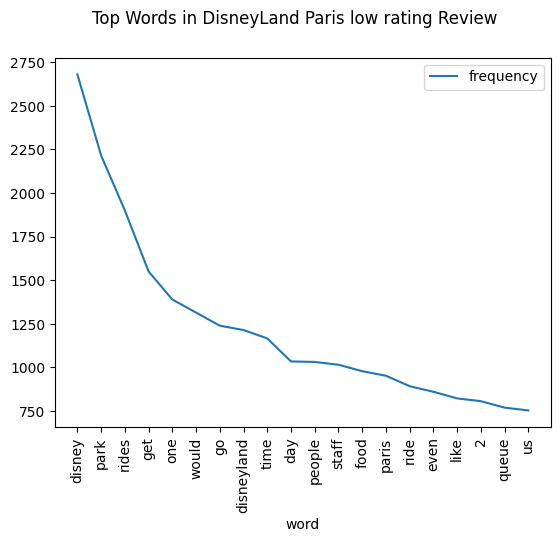

In [ ]:
x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in DisneyLand Paris low rating Review')
plt.show()


## Word Cloud

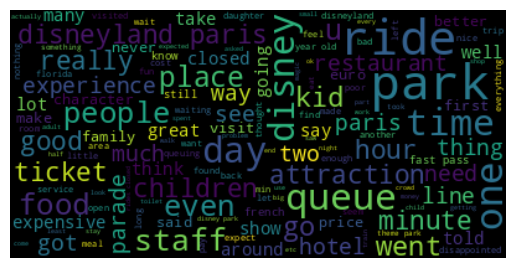

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_Paris_low['Review_Text']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_Paris_low['Review_Text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##Tokenizer

In [ ]:
df_Paris_low['Review_Text'] = df_Paris_low.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)
df_Paris_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670216406,2,2019-4,Greece,"[booked, tickets, line, disneyland, ,, somethi...",Disneyland_Paris,0
1,669337300,1,2019-4,Greece,"[selling, fastpass, tickets, without, buy, ent...",Disneyland_Paris,0
2,669121201,2,2019-4,Switzerland,"[went, disneyland, paris, easter, break, famil...",Disneyland_Paris,0
3,668207242,1,2019-4,United Kingdom,"[shame, park, carry, name, disney, ..., build,...",Disneyland_Paris,0
4,668123744,2,2019-4,United Kingdom,"[know, disneyland, money, machine, realised, m...",Disneyland_Paris,0


In [ ]:
print(df_Paris_low['Review_Text'][0])
print(df_Paris_low['Review_Text'][1])
print(df_Paris_low['Review_Text'][2])


['booked', 'tickets', 'line', 'disneyland', ',', 'something', 'recommend', ',', 'lines', 'already', 'long', 'got', 'there', ',', 'booking', 'tickets', 'advance', 'help.i', 'advised', 'buy', 'fast', 'passes', ',', 'decided', 'to', ',', 'clear', 'website', 'also', 'counted', 'entrance', 'ticket', ',', 'meaning', ';', 'total', 'price', '90', 'euro', 'entrancevinstead', '74', '68', 'extra', '90', 'euro', "'s", ',', 'depending', 'age', 'child.but', 'even', 'would', 'have', ',', 'lines', 'long', 'well', ',', 'also', ',', 'kind', 'system', 'this', '?', 'people', 'much', 'spend', 'held', 'back', ',', 'people', 'money', 'obviously', 'skip', 'lines', '...', 'absolutely', 'ridiculous.getting', 'something', 'eat', 'horrible', ',', 'lines', 'everywhere', '...', 'just', 'eat', 'someting', 'right', '...', 'and', 'get', 'started', 'staff', ',', 'trying', 'figure', 'amount', '3', 'icecreams', 'small', 'casio', 'computer', ',', 'able', 'to', ',', 'rude', 'staff', '.', '2', 'ladies', 'friendly', ',', 'ho

## Lexicon Normalization

###Stemming

In [ ]:

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# this is the function we will use
ps = PorterStemmer()

filtered_sent = df_Paris_low['Review_Text'][1]

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)


Filtered Sentence: ['selling', 'fastpass', 'tickets', 'without', 'buy', 'entrance', 'tickets', '?', '?', '?', 'answer', '?', '?', '?', 'shame', 'you', '!', '!', '!', 'came', 'greece', 'entrance', '!', '!', '!', 'avoid', 'place', '!', '!', '!']
Stemmed Sentence: ['sell', 'fastpass', 'ticket', 'without', 'buy', 'entranc', 'ticket', '?', '?', '?', 'answer', '?', '?', '?', 'shame', 'you', '!', '!', '!', 'came', 'greec', 'entranc', '!', '!', '!', 'avoid', 'place', '!', '!', '!']


In [ ]:

df_Paris_low['Stemmed'] = df_Paris_low['Review_Text'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.

In [ ]:
# check your work!
print(df_Paris_low['Review_Text'][0]) # reported
print(df_Paris_low['Stemmed'][0]) # report

print(df_Paris_low['Review_Text'][10]) # note the difference between inches, reported, covered
print(df_Paris_low['Stemmed'][10]) # inch, report, cover

['booked', 'tickets', 'line', 'disneyland', ',', 'something', 'recommend', ',', 'lines', 'already', 'long', 'got', 'there', ',', 'booking', 'tickets', 'advance', 'help.i', 'advised', 'buy', 'fast', 'passes', ',', 'decided', 'to', ',', 'clear', 'website', 'also', 'counted', 'entrance', 'ticket', ',', 'meaning', ';', 'total', 'price', '90', 'euro', 'entrancevinstead', '74', '68', 'extra', '90', 'euro', "'s", ',', 'depending', 'age', 'child.but', 'even', 'would', 'have', ',', 'lines', 'long', 'well', ',', 'also', ',', 'kind', 'system', 'this', '?', 'people', 'much', 'spend', 'held', 'back', ',', 'people', 'money', 'obviously', 'skip', 'lines', '...', 'absolutely', 'ridiculous.getting', 'something', 'eat', 'horrible', ',', 'lines', 'everywhere', '...', 'just', 'eat', 'someting', 'right', '...', 'and', 'get', 'started', 'staff', ',', 'trying', 'figure', 'amount', '3', 'icecreams', 'small', 'casio', 'computer', ',', 'able', 'to', ',', 'rude', 'staff', '.', '2', 'ladies', 'friendly', ',', 'ho